In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [81]:
import seaborn as sns

In [82]:
data = pd.read_csv(r"C:\Self-Learning\Kaggle\CustomerSegmentation\Mall_Customers.csv")

In [83]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
data.shape

(200, 5)

In [85]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [86]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Total there are 200 line items describing mall customer's characteristics.<br>
We have 3 Numeric (Age, Annual Income, Spending Score) and 1 Categorical feature (Gender)<br>

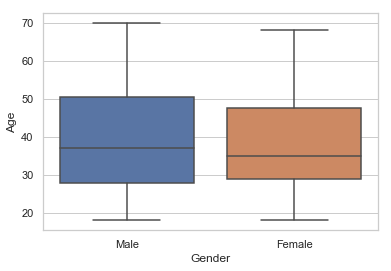

In [87]:
# Age Distribution for Male Vs Female
sns.boxplot("Gender", "Age", data=data)

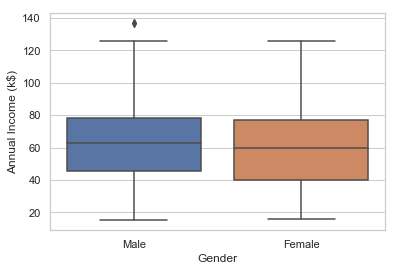

In [88]:
# Annual Income Distribution for Male Vs Female
sns.boxplot("Gender", "Annual Income (k$)", data=data)

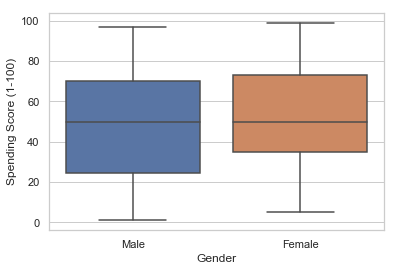

In [89]:
# Spending Score Distribution for Male Vs Female
sns.boxplot("Gender", "Spending Score (1-100)", data=data)

Gender does <b>NOT</b> seem to have any major impact on any of the other variables.<br>
Male and Female customers behave more or less in a same manner.

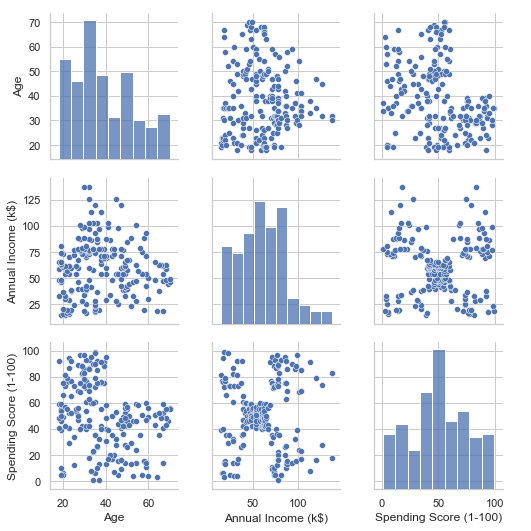

In [90]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.pairplot(data[features])

From the above pairwise plot, we can observe segmentation for <b>Annual Income</b> Vs <b>Spending Score</b> features

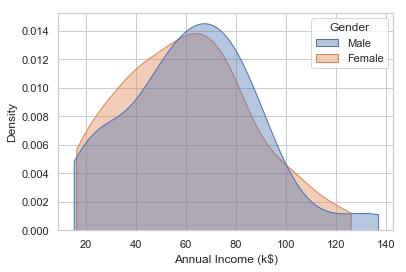

In [91]:
# Density plot to show the Annual Income distribution By Gender
# set seaborn whitegrid theme
sns.set(style="whitegrid")

sns.kdeplot(data=data, x="Annual Income (k$)", hue="Gender", cut=0, fill=True, common_norm=False, alpha=0.4)
plt.show()

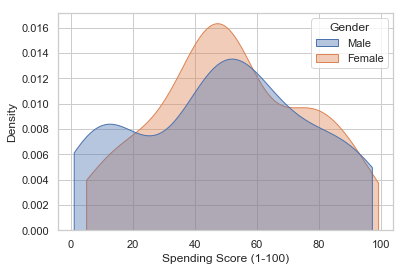

In [92]:
# Density plot to show the Annual Income distribution By Gender
# set seaborn whitegrid theme
sns.set(style="whitegrid")

sns.kdeplot(data=data, x="Spending Score (1-100)", hue="Gender", cut=0, fill=True, common_norm=False, alpha=0.4)
plt.show()

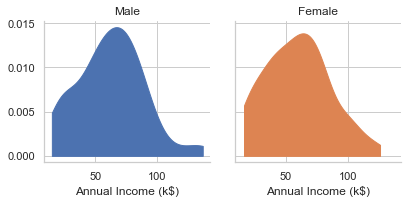

In [93]:
# Multiple Density Graphs

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(data, col='Gender', hue='Gender', col_wrap=2)

# draw density plots
g = g.map(sns.kdeplot,"Annual Income (k$)", cut=0, fill=True, common_norm=False, alpha=1, legend=False)


# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

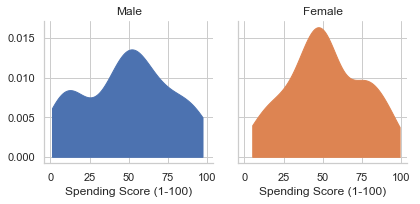

In [94]:
# Multiple Density Graphs

# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(data, col='Gender', hue='Gender', col_wrap=2)

# draw density plots
g = g.map(sns.kdeplot,"Spending Score (1-100)", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

In [95]:
data['CustomerID'].nunique()

200

<b>NOTE</b>: All customer entries are Unique

In [96]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [97]:
data['Gender'] = data['Gender'].apply(lambda x : 1 if x == 'Male' else 0)

In [98]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [110]:
data_copy = data.copy()

In [111]:
data_copy.drop('CustomerID', axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [112]:
from sklearn.cluster import KMeans

In [113]:
def try_different_clusters(K_upto, data):
    
    cluster_values = list(range(1, K_upto+1))
    inertias = []
    
    for k in cluster_values:
        model = KMeans(n_clusters=k, init='k-means++', max_iter=400, random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)
        
    return inertias
    

In [114]:
data_copy.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [115]:
# Find output for k values between 1 to 12 
outputs = try_different_clusters(12, data_copy[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

Find Optimum number of clusters using <b>Elbow Method</b>

In [116]:
import plotly.graph_objects as go

In [117]:
# Finding optimal number of clusters k
figure = go.Figure()

figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),                  
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

From the above plot, Optimum number of clusters seems to be <b>5</b>

In [121]:
kmeans_model_new = KMeans(n_clusters=5, init='k-means++', max_iter=400, random_state=42)
kmeans_model_new.fit_predict(data_copy[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

### Visualizing Clusters

In [124]:
cluster_centers = kmeans_model_new.cluster_centers_
cluster_centers

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.51351351, 40.32432432, 87.43243243, 18.18918919],
       [ 0.41772152, 43.12658228, 54.82278481, 49.83544304],
       [ 0.40909091, 25.27272727, 25.72727273, 79.36363636]])

In [125]:
data['cluster'] = kmeans_model_new.labels_

In [126]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [129]:
# visualize clusters
import plotly.express as px

figure = px.scatter(data,
                    color='cluster',
                    x="Annual Income (k$)",
                    y="Spending Score (1-100)",          
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}                    
                    )
figure.update_layout()
figure.show()

In [132]:
# 3D Visualization

# visualize clusters
figure = px.scatter_3d(data,
                    color='cluster',
                    x="Annual Income (k$)",
                    y="Spending Score (1-100)",
                    z="Age",            
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}                    
                    )
figure.update_layout()
figure.show()